In [1]:
import numpy as np                    #here we load numpy
import matplotlib.pyplot as plt   #here we load matplotlib
import time                   #and load some utilities
from numba import njit

In [15]:
@njit(fastmath=True)
def linearconv_withoutCFL(nx):
    dx = 2 / (nx - 1)
    nt = 20    #nt is the number of timesteps we want to calculate
    dt = .025  #dt is the amount of time each timestep covers (delta t)
    c = 1
    grid = np.linspace(0,2,nx) # creating the space grid
    
    u0 = np.ones(nx)      #defining a numpy array which is nx elements long with every value equal to 1.
    u0[int(.5/dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
    u = u0.copy()

    un = np.ones(nx) #initializing our placeholder array, un, to hold the values we calculate for the n+1 timestep

    for n in range(nt):  #iterate through time
        un = u.copy() ##copy the existing values of u into un
        for i in range(1, nx):
            u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
        
    return u0, u, grid

In [29]:
nx = 83
#compute the cpu time of the solving 1d linear convection
start = time.time()
u0, u, grid = linearconv_withoutCFL(nx)
#u0, u, grid = linearconv_withCFL(nx)
end = time.time()        
print("Execution time is : {msec} ms".format(msec=(end-start)*1000) )       

Execution time is : 0.17714500427246094 ms


In [ ]:
#Plotting data
plt.plot(grid,u0);
plt.plot(grid,u);
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Linear Convection')   

In [23]:
@njit
def linearconv_withCFL(nx):
    dx = 2 / (nx - 1)
    nt = 20    #nt is the number of timesteps we want to calculate
    c = 1
    CFL = 0.4
    dt = CFL*dx/np.fabs(c) 
    grid = np.linspace(0,2,nx) # creating the space grid
    
    u0 = np.ones(nx)      #defining a numpy array which is nx elements long with every value equal to 1.
    u0[int(.5/dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
    u = u0.copy()

    un = np.ones(nx) #initializing our placeholder array, un, to hold the values we calculate for the n+1 timestep

    for n in range(nt):  #iterate through time
        un = u.copy() ##copy the existing values of u into un
        for i in range(1, nx):
            u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
        
    return u0, u, grid

In [27]:
nx = 83
#compute the cpu time of the solving 1d linear convection
start = time.time()
u0, u, grid = linearconv_withCFL(nx)
end = time.time()        
print("Execution time is : {msec} ms".format(msec=(end-start)*1000) )      

Execution time is : 0.2205371856689453 ms


Text(0.5, 1.0, '1D Linear Convection')

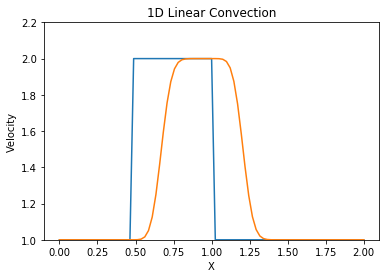

In [28]:
#Plotting data
plt.plot(grid,u0);
plt.plot(grid,u);
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Linear Convection')